In [298]:
#importamos las librerias a usar.
import pandas as pd
import plotly.express as pe
import matplotlib.pyplot as plt
from scipy import interpolate
import seaborn as sns


<h2>Se Nos Ha Presentado Una Base De Datos Para Lograr Optimizar El Movimiento De Los Empleados Y Lograr Reducir Emiciones De CO2 Así Mejorando El Medio Ambiente.</h2>

In [299]:
#Importamos el archivo.
df = pd.read_csv("StudyCase.csv",sep=',', skiprows=1, header=None)

In [300]:
#visualizamos las primeras 5 rows de la base de datos.
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,000wxj0vvr5pygp7s000wxj0z9namx02,Medellín,3.0,46.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.299881,-75.568616,5.982484,5-7 KM,14,1,0.0,3796.704311,0.000000,197428.624193
1,02hw4jm4q9j5b9aqa57602hw4qj1e52s,Medellín,5.0,47.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.237545,-75.599219,3.687273,1-5 KM,12,0,1.0,1453.465431,0.000000,75580.202431
2,03c17n7t2s1fqic68p03c17e2ih8dyjn,Medellín,5.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.241250,-75.596384,3.300303,1-5 KM,10,2,0.0,0.000000,427.033037,22205.717944
3,05v3q5w0wvj9q58dfu05v3q0arpgnwz6,Envigado,5.0,35.0,1.0,1.0,1.0,1.0,1.0,0.0,...,6.178512,-75.572015,5.072694,5-7 KM,10,0,1.0,13093.354458,0.000000,680854.431820
4,065kzg2431kszaejuw9gnon065kzhf76,Envigado,3.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.167134,-75.598178,4.600234,1-5 KM,10,0,0.0,0.000000,0.000000,0.000000


<h1>Entiendiendo nuestro sector demográfico</h1>

In [301]:
#Sumamos los valores de mujer y de hombre para sacar un total de la poblaciòn.
generoTotal = df[82].value_counts()

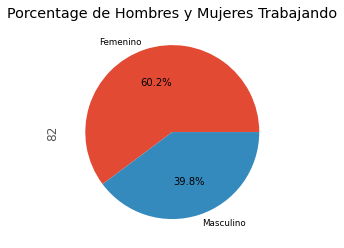

In [302]:
#Titulo de la gráfica
plt.title("Porcentage de Hombres y Mujeres Trabajando")

#Bar graph para visualizar hombres vs mujeres
#plot1 = sns.countplot(x=df[82],data=df).set(ylabel='Cantidad', xlabel='Género')

#Pie Chart para visulizar los porcentages de mujeres y hombres.
demos = generoTotal.plot.pie(autopct='%.1f%%')

<p>Vemos que 60% de los empleados es femenino y 39% es masculino.</p>

<h2>Analizando trabajadores por estrato.</h2>

In [303]:
#Seleccionamos el estrato.
estrato = df[2]

#Contamos los estratos para saber cuantos trabajadores hay de cada uno de los estratos y los indexsamos para verlos en orden
amountStrato = estrato.value_counts().sort_index()

#Visualizamos la cantidad de personas viviendo en cada estrato de 1 a 6.
amountStrato



1.0     38
2.0    275
3.0    681
4.0    323
5.0    229
6.0     69
Name: 2, dtype: int64

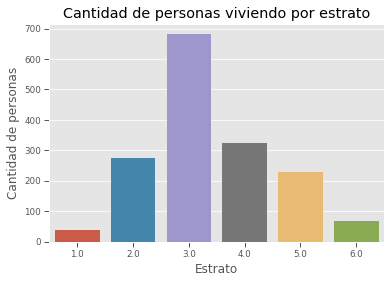

In [304]:
#Titulo de la gráfica
plt.title('Cantidad de personas viviendo por estrato')

#Gráfica mostrando cuantas personas viven por estrato.
estratoPlot = sns.countplot(x=estrato, data=amountStrato).set(ylabel='Cantidad de personas', xlabel='Estrato')


<h2>Analizando las ubicaciones de los empleados </h2>

In [305]:
ciudades = df[1]

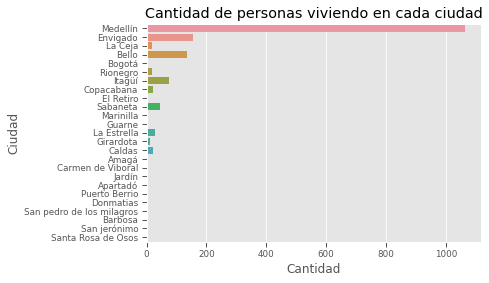

In [306]:
plt.title('Cantidad de personas viviendo en cada ciudad')
#Gráfica de la cantidad de personas por ciudad.
viven = sns.countplot(y=df[1], data=ciudades).set(ylabel='Ciudad', xlabel='Cantidad')

<p> Podemos entender que no todos nuestros empleados viven en Medellín.</p>

<h2>Analizando las edades de los trabajadores.</h2>

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,Edades
0,000wxj0vvr5pygp7s000wxj0z9namx02,Medellín,3.0,46.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-75.568616,5.982484,5-7 KM,14,1,0.0,3796.704311,0.000000,197428.624193,40-50
1,02hw4jm4q9j5b9aqa57602hw4qj1e52s,Medellín,5.0,47.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-75.599219,3.687273,1-5 KM,12,0,1.0,1453.465431,0.000000,75580.202431,40-50
2,03c17n7t2s1fqic68p03c17e2ih8dyjn,Medellín,5.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-75.596384,3.300303,1-5 KM,10,2,0.0,0.000000,427.033037,22205.717944,40-50
7,07mxmay8jzh5ontw07mxmajs659okfbe,Medellín,4.0,47.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-75.595448,6.225426,5-7 KM,10,0,1.0,2044.971203,0.000000,106338.502550,40-50
27,0rtahd6wy24s2ij0rtu18mea4rpkpaan,Itagüí,3.0,46.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-75.596051,7.557211,7-15 KM,10,0,0.0,2131.133498,0.000000,110818.941913,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,zhqqkpv5s4pwzhqplsllpvom6jue5jyu,Medellín,3.0,48.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-75.582039,4.507989,1-5 KM,12,1,0.0,13962.923330,1677.743543,813314.677398,40-50
1601,zk3m1fo7orlxxbyzk3m1fv0d8magiyeg,Itagüí,3.0,40.0,1.0,1.0,0.0,0.0,1.0,0.0,...,-75.630214,10.466790,7-15 KM,6,0,0.0,12823.800884,0.000000,666837.645988,30-40
1605,zm8jp0jxgzz004wniwzm8jp0cwcexmif,Puerto Berrio,1.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-74.404759,5.920821,5-7 KM,9,6,1.0,0.000000,2545.800156,132381.608098,40-50
1612,zre2fcrxidx7atdzzre2qjg5foqtdssg,Medellín,3.0,40.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-75.572166,5.381473,5-7 KM,12,0,1.0,2927.383344,0.000000,152223.933878,30-40


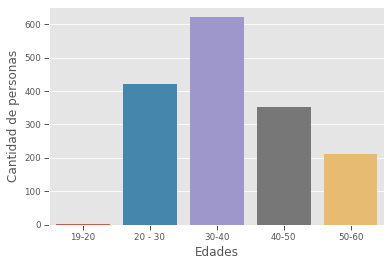

In [307]:
#Agrrando la información de las edades.
age = df[3]
ageTotal= age.value_counts().sort_index()

#Gráficamos las edades en 5 grupos.
bins = [19,20,30,40,50,60]
labels = ['19-20', '20 - 30', '30-40', '40-50', '50-60']
#Creamos una nueva columna que se llama edades. Con cut creamos grupos de edades. Los bins son los grupos en los cuales van las edades.
df['Edades']=pd.cut(age, bins=bins, labels = labels, right=True)
tablePersonas = sns.countplot(x=df['Edades'], data=age).set(ylabel="Cantidad de personas")
#Buscando cuantas personas entre la edad de 40 y 50 para ver si está igual a la gráfica.
old = df[(age >= 40) & (age<= 50)]
old



<p>Acá podemos ver que tenemos 5 grupos de edades, podemos ver que la mayoria de trabajadores tienen edades entre 30-40 años.</p>

<h2>Analizando el transporte de nuestros empleados.</h2>

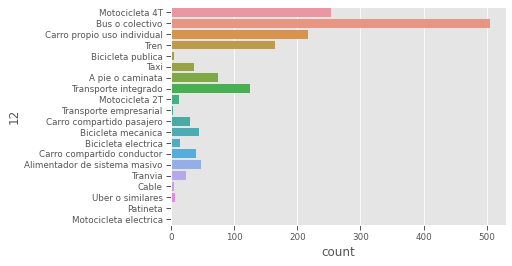

In [308]:
#Buscamos la forma de transporte de los trabajadores y sumamos los totales.
trans = df[12]
transport = sns.countplot(y=df[12], data=trans)

<p> Vemos que la mayoria prefiere moverse ya sea mediante Moto 4 tiempos, bus o colectivo.</p>

In [309]:
#Evarage time to get to work per city.
Medellin = df.loc[(df[1]== 'Medellín')]
timeMed = Medellin[14].mean()
print ("The avergae time for a person from Medellín to get to work is " + str(timeMed)[0:4] + " minutes.")

#Average time to get to work from Envigado
Envigado = df.loc[(df[1]== 'Envigado')]

timeEnv = Envigado[14].mean()
print ("The avergae time for a person from Envigado to get to work is " + str(timeEnv)[0:4] + " minutes.")

The avergae time for a person from Medellín to get to work is 33.1 minutes.
The avergae time for a person from Envigado to get to work is 38.2 minutes.


<h4>Por el momento vamos a tomar 2 datos, el dato de ciudad y el dato de modo de transporte. Estos 2 datos nos ayudaran a evaluar qué ciudades emiten la mayoria de co2 anualmente y vamos a proponer una estrategia para reducir las emiciones de CO2 anuales.</h4>


<h2>Supuestos</h2>
<p>Tenemos un grupo de personas y nos interesa saber como se mueven los empleados</p>
<ul>
    <li>Se está emitiendo mucho CO2 al planeta anualmente.</li>    
</ul>

<h3>Vamos a tomar las emiciones anuales de cada persona. Usando la longitud y latitud de cada persona. Verémos qué personas están emitiendo CO2 y así ver que ciudad tiene la mayoria de CO2 y ver como combatir estas emiciones.</h3>

In [315]:
#Le asignamos variables a la longitud y latitud.
lat = df[83]
lon = df[84]

#Agregamos las emiciones a una lista para poder compararla lista contra las latitudes y longitudes
list1 = df[92].values.tolist()
#Interpolamos la lista de las emiciones de carbonos para poder verla en por su latitud y longitud.
valoresCo2 = interpolate.interp1d([1,max(list1)], [2,30], fill_value="extrapolate")
#Armamos un radio en cuanto a los valosres de la lista de carbono emitido anualmente.
circle_radius=valoresCo2(list1)

#Usamos el open street map para ver las las emiciones usando la longitud y latitud.
print('Heatmap del carbono emitido por cada persona.')
fig = pe.density_mapbox(df, lat=83, lon=84,radius=circle_radius,zoom=2, mapbox_style='open-street-map')
#Mostrar el mapa.
fig.show()

Heatmap del carbono emitido por cada persona.


<p> Vemos que Medellín es la ciudad con mayor emisiòn de gases. Para combatir los altos altos niveles de emiciones de gases,  buscaremos a personas que vivan entre 5 a 10km del trabajo que usen vehiculos motorizados y que sean menores a 50 años. Les brindaremos una cicla con el sticker de la compañia. La cicla será su medio de transporte principal y buscarà reducir las emiciones de CO2 y promover la salud en una población selecta.</p>

In [311]:
#Apartamos la tecnología del vehiculo en una variable para retirar los valores nan
gas = df[19].dropna()
#Filtramos para ubicar las personas menores de 30 años que vivan de 7 a 15kms dek trabajo y que usen tecnoloía gasolina. Para ofrecerles a ellos la oprtunidad de ir a trabajar en cicla y así reducir las emiciones de gas.
df.loc[(df[3]<=30) & (df[86] == '7-15 KM') & (gas== 'Gasolina')]

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,Edades
33,0xsk8ozqcenn8fn4bi1pko00xsk8ozqu,Copacabana,3.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-75.505078,16.632972,7-15 KM,9,10,1.0,0.000000,16777.435434,8.724266e+05,20 - 30
69,1tj2d2zzzc6j2psun1tj2dzug2p4c0rh,Bello,3.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-75.557642,16.191901,7-15 KM,10,0,1.0,5318.828284,0.000000,2.765791e+05,20 - 30
73,1vnftogy64o6ymh7to1vnftovmpk4212,Medellín,2.0,29.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-75.576086,7.349865,7-15 KM,10,2,0.0,0.000000,1473.263979,7.660973e+04,20 - 30
117,2x07p5s5hkr3v2x07b0h61skyzdrqnuz,Medellín,1.0,29.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-75.541376,9.278161,7-15 KM,12,0,0.0,5047.082240,0.000000,2.624483e+05,20 - 30
178,41t9lhozgek25eqyzs41t9lhzxsr41h6,Copacabana,3.0,28.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-75.505078,14.042284,7-15 KM,12,0,0.0,7638.642978,0.000000,3.972094e+05,20 - 30
229,5gkv60nzukq9xzt5fo5j22zcpaidi19o,Medellín,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-75.595100,8.470080,7-15 KM,9,0,1.0,0.000000,0.000000,0.000000e+00,20 - 30
235,5n8g1aeey5akprpibrzgk4uysvq5n8g1,La Estrella,3.0,30.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-75.633212,15.956826,7-15 KM,12,12,1.0,5399.789848,2562.198224,4.140234e+05,20 - 30
308,74g7r4lfobr5dn0gfmp74g78ilx918p2,Medellín,3.0,29.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-75.559132,7.788016,7-15 KM,10,0,1.0,3530.400921,0.000000,1.835808e+05,20 - 30
312,7639ee17tylzcw4tbe7639ev5b3rc17j,Bello,4.0,27.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-75.561098,10.337568,7-15 KM,10,0,0.0,2915.194085,0.000000,1.515901e+05,20 - 30
354,7z0pb0mw1m267bcmed7z0ppl7ntr0hzp,Bello,1.0,30.0,1.0,1.0,0.0,1.0,1.0,0.0,...,-75.571805,12.643427,7-15 KM,8,0,0.0,4585.133581,0.000000,2.384269e+05,20 - 30


<p> Se llegó a la conclución de que si tomamos en cuenta las variables como personas de 30 años, personas que vivan de 7 a 15 Km del trabajo y las personas que utilizan vehiculos de gasolina, solo serian 47 personas las cuales dejarian de usar sus vecihulos. Esas no serían las suficientes personas para lograr hacer una disminución en la producción de CO2 anual.</p>

<p> Proponemos que las personas que quieran trabajar desde casa lo hagan para que hallan menos emisiones de CO2 anuales.</p>

In [312]:
#Creamos una nueva columna que se llama trabajoremoto donde asignaremos valores de si y no a los 1 y 0
p = df['trabajoremoto'] = df[11].map({True: 'yes', False: 'no'})
#Vemos que se hayan asignado los valores.
p

0        no
1       yes
2        no
3       yes
4        no
       ... 
1621    yes
1622     no
1623     no
1624     no
1625    yes
Name: 11, Length: 1626, dtype: object

In [313]:
#Visualizamos cuantas personas les gustaria trabajar desde casa y cuantas no.
p.value_counts()

no     965
yes    650
Name: 11, dtype: int64

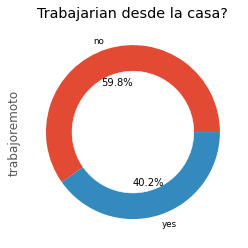

In [314]:
#Número total de personas que trabajarian desde la casa.
workHome = df['trabajoremoto'].value_counts()
#Gráfica de dona.
workHome.plot.pie(autopct='%.1f%%')
donut = plt.Circle((0,0), 0.7, color='White')
p=plt.gcf()
p.gca().add_artist(donut)
plt.title('Trabajarian desde la casa?')
plt.show()

<h1>Conclusión</h1>
<p>Para lograr reducir las emiciones de CO2 emitidas se propone que selectos grupos de personas que vivan muy lejos o quienes prefieran trabajar desde casa lo haga. Las personas que vivan entre 7-15 KM, sean menores de 30 años y que usen vehiculos de gasolina se les otorgue una cicla por parte de la compañia así promover el cuidado del medio ambiente y promover mejor salud para empleados.</p>